# EXTRACT DATA FEATURES FOR CAUSAL INFERENCE

## Load the data

In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv('saved_data/lemmatized_reviews_Bacchanal_Buffet.csv', parse_dates=['date'], lineterminator='\n')
data = data.dropna(axis=0)
data.reset_index(inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10123 entries, 0 to 10122
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            10123 non-null  int64         
 1   user_id          10123 non-null  object        
 2   business_id      10123 non-null  object        
 3   stars            10123 non-null  int64         
 4   useful           10123 non-null  int64         
 5   text             10123 non-null  object        
 6   date             10123 non-null  datetime64[ns]
 7   text_length      10123 non-null  int64         
 8   nbr_words        10123 non-null  int64         
 9   lemmatized_text  10123 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 791.0+ KB


,index,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text
0,0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...
1,1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...
2,2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...
3,3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...
4,4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...


### Remove some unnecessary characters

In [3]:
data['processed_text'] = data.text.apply(lambda x: re.sub(r'[\n]', ' ', x))
data.head()

,index,user_id,business_id,stars,useful,text,date,text_length,nbr_words,lemmatized_text,processed_text
0,0,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,937,176,get food poisoning Palms hotel scared eat buff...,After getting food poisoning at the Palms hote...
1,1,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,4975,940,feast worthy god Baccarnal Buffet Caesar Palac...,"""A feast worthy of Gods"" Baccarnal Buffet in ..."
2,2,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,671,131,crab leg well one Wicked Spoon huge prawn shee...,The crab legs are better than the ones at Wick...
3,3,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,92,18,worth salty food expensive furst kast visit bu...,Not worth it! Too salty food and expensive! Th...
4,4,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,333,63,infinite star family diamond card Caesars Pala...,I would give this infinite stars if I could. M...


In [4]:
data.processed_text.iloc[1]

'"A feast worthy of Gods"  Baccarnal Buffet in Caesar Palace is consider the best buffet in the Las Vegas by most food critics   It rated highest in trip advisor and yelp for a buffet restaurant in Vegas.  I was only going to eat Buffet once in this trip, so I decided must try the best there is available.  My review is based on late breakfast and lunch during a non-holiday weekday.  Finding this place is confusing and take more than five minutes from the main entrance to get here, this is common in most buffet in the strip.    Admission Price *Breakfast (Monday - Friday, 7 a.m. - 11 a.m.): $25.99 *Brunch (Saturday - Sunday, 8 a.m. - 3 p.m.): $40.99 * Lunch (Monday - Friday, 11 a.m. - 3 p.m.): $32.99 * Dinner (Daily, 3 p.m. - 10 p.m.): $45.99 on weekdays, $50.99 on weekends  * Holiday expect to paid $10 more. * Total Reward Card Holder gets $1 off. * Price not included the 8.1% sales tax.  Atmosphere The interior is similar to those of mid-level restaurant, they claim it cost 17 million

## Extract features 

In [5]:
import matplotlib.pyplot as plt

**Treatments:**
- Latent treatments inferred by sIBP
- Sentiment of the review

**Confounders:**
- Star rating
- Number of words
- Reviewer's number of fans
- Reviewer's number of written reviews

**Others:**
- Formality of the review
- Reviewer's average star rating

In [6]:
features = pd.DataFrame()

### Treatment: Latent treatments inferred by sIBP

In [8]:
## Read results from the sIBP

treatments = pd.read_csv('saved_data/sibp_treatments.csv')

n_latent_treatments = len(treatments.columns)-1

treatments.head()

,is_test_data,Z1,Z2
0,1,1.000000e+00,1.000000e+00
1,1,1.000000e+00,1.790524e-180
2,0,2.006906e-27,9.842977e-43
3,1,1.493567e-50,1.381000e-12
4,1,9.996250e-40,2.347771e-26


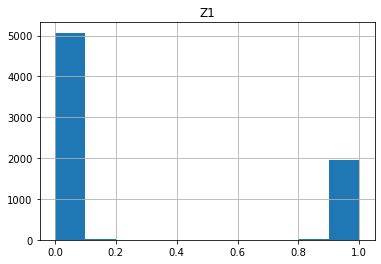

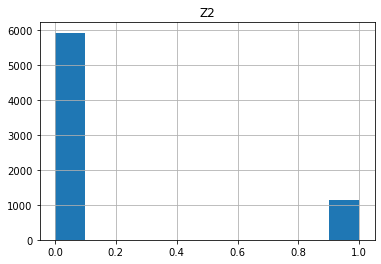

In [9]:
## Have a look at the latent treatments

for i in range(1, n_latent_treatments+1):
    plt.figure();
    plt.title('Z' + str(i))
    treatments['Z' + str(i)].loc[treatments['is_test_data'] == 1].hist();

In [10]:
features['test'] = treatments['is_test_data']

for i in range(1, n_latent_treatments+1):
    col = 'Z' + str(i)
    features[col] = treatments.apply(lambda row: 1 if row[col] > 0.5 else 0, axis=1)

groupby = ['test']
groupby.extend(['Z' + str(i) for i in range(1, n_latent_treatments+1)])
print(features.groupby(by=groupby).size()) 
    
features.head()

test  Z1  Z2
0     0   0      697
      1   0      363
          1     1976
1     0   0     5092
      1   0      835
          1     1160
dtype: int64


,test,Z1,Z2
0,1,1,1
1,1,1,0
2,0,0,0
3,1,0,0
4,1,0,0


### Treatment: Sentiment of the review

In [11]:
from transformers import pipeline
import numpy as np

In [12]:
nlp_sentiment = pipeline('sentiment-analysis')

sentiments = []

for _, row in data.iterrows():
    result = nlp_sentiment(row.processed_text)[0]
    sentiments.append(np.round(result['score']))

features['sentiment'] = sentiments

IndexError: index out of range in self

### Confounders: Star rating & Number of words

In [13]:
features[['stars', 'n_words']] = data[['stars', 'nbr_words']]

features.head()

,test,Z1,Z2,stars,n_words
0,1,1,1,5,176
1,1,1,0,4,940
2,0,0,0,4,131
3,1,0,0,1,18
4,1,0,0,5,63


### Confounder: Reviewer's number of fans & Reviewer's number of written reviews

In [14]:
# Read user data (takes a minute or two but works fine)

df_users = pd.read_json('../yelp_data/user.json', lines=True)

df_users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [17]:
n_fans = []
n_reviews = []

for _, row in data.iterrows():
    temp = df_users.loc[df_users['user_id'] == row.user_id]
    n_fans.append(temp.iloc[0].fans)
    n_reviews.append(temp.iloc[0].review_count)

features['n_fans'] = n_fans
features['n_reviews'] = n_reviews

features.head()

,test,Z1,Z2,stars,n_words,useful,useful_discrete,n_fans,n_reviews
0,1,1,1,5,176,0,0,0,3
1,1,1,0,4,940,39,3,330,1224
2,0,0,0,4,131,1,1,113,1864
3,1,0,0,1,18,0,0,0,6
4,1,0,0,5,63,0,0,0,15


## Group label 'useful'

In [15]:
features['useful'] = data['useful']

def group_useful(useful):
    if useful == 0:
        return 0
    elif useful <= 5:
        return 1
    elif useful <= 10:
        return 2
    else:
        return 3

features['useful_discrete'] = features.apply(lambda row: group_useful(row['useful']), axis=1)

features.head()

,test,Z1,Z2,stars,n_words,useful,useful_discrete
0,1,1,1,5,176,0,0
1,1,1,0,4,940,39,3
2,0,0,0,4,131,1,1
3,1,0,0,1,18,0,0
4,1,0,0,5,63,0,0


## Save features to file

In [18]:
filename = 'saved_data/features.csv'

features.to_csv(filename, index=False)

## OLD

### 1. With transformers

In [ ]:
from transformers import pipeline

In [ ]:
def print_sentiment_for_datapoint(data, index):
    nlp_sentiment = pipeline('sentiment-analysis')
    result = nlp_sentiment(data.iloc[index].processed_text)[0]

    print("TEXT:")
    print(data.iloc[index].processed_text)
    print("RESULT:")
    print(result)

In [ ]:
print_sentiment_for_datapoint(data, 4)
print_sentiment_for_datapoint(data, 3)

In [ ]:
index=4
nlp_feature = pipeline('feature-extraction')
result = nlp_feature(data.iloc[index].processed_text)
result